<a href="https://colab.research.google.com/github/SkyHonor/Research-on-Deep-Learning-Algorithms/blob/main/transfer-learning/ConvNext%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from PIL import Image, ImageFile
import torch.nn.functional as F

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
import random
import numpy as np
import torch
from PIL import Image, ImageFile
import matplotlib.pyplot as plt

!wget http://usrbb.ru/botainika/Pepper.zip
!unzip Pepper.zip


transformation = transforms.Compose([transforms.Resize((256,256)),
                                     transforms.ToTensor()
                                    ])

data_path = datasets.ImageFolder(root="Pepper", transform = transformation)
batch_size = 16

train_dataloader = DataLoader(data_path,
                        shuffle=True,
                        num_workers=1,
                        batch_size=batch_size)

--2024-04-06 01:26:31--  http://usrbb.ru/botainika/Pepper.zip
Resolving usrbb.ru (usrbb.ru)... 213.141.129.202
Connecting to usrbb.ru (usrbb.ru)|213.141.129.202|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21077184 (20M) [application/zip]
Saving to: ‘Pepper.zip’

Pepper.zip          100%[===================>]  20.10M  2.25MB/s    in 10s     

2024-04-06 01:26:42 (1.94 MB/s) - ‘Pepper.zip’ saved [21077184/21077184]

Archive:  Pepper.zip
   creating: Pepper/
   creating: Pepper/Aphid/
  inflating: Pepper/Aphid/10.jpg     
  inflating: Pepper/Aphid/11.jpg     
  inflating: Pepper/Aphid/12.jpg     
  inflating: Pepper/Aphid/17.jpg     
  inflating: Pepper/Aphid/2.jpg      
  inflating: Pepper/Aphid/23.jpg     
  inflating: Pepper/Aphid/3.jpg      
  inflating: Pepper/Aphid/6.jpg      
  inflating: Pepper/Aphid/9.jpg      
  inflating: Pepper/Aphid/a1.jpg     
  inflating: Pepper/Aphid/a13.jpg    
  inflating: Pepper/Aphid/a15.jpg    
  inflating: Pepper/Aphid/a1

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_path, test_size=0.2, random_state=0)

train_data_size = len(train)
test_data_size = len(test)

batch_size=8
train_data_loader = DataLoader(train, batch_size=batch_size)
test_data_loader = DataLoader(test, batch_size=batch_size)

In [ ]:
model = models.convnext_large(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Large_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/convnext_large-ea097f82.pth" to /root/.cache/torch/hub/checkpoints/convnext_large-ea097f82.pth
100%|██████████| 755M/755M [00:10<00:00, 74.7MB/s]


In [ ]:
print(model)

In [ ]:
num_classes = len(data_path.classes)
model.classifier[2] = nn.Linear(1536, num_classes)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda")

In [ ]:
from torch import optim

net = model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.0001 )

epochs = 30
counter = []
loss_history = []
iteration_number= 0

Epoch number 0
 Current loss 2.283118963241577

Epoch number 0
 Current loss 2.0996744632720947

Epoch number 1
 Current loss 1.815970778465271

Epoch number 1
 Current loss 1.3756637573242188

Epoch number 2
 Current loss 0.8857263326644897

Epoch number 2
 Current loss 0.7518683075904846

Epoch number 3
 Current loss 0.5479468107223511

Epoch number 3
 Current loss 0.28579410910606384

Epoch number 4
 Current loss 0.10772786289453506

Epoch number 4
 Current loss 0.09656833112239838

Epoch number 5
 Current loss 0.052387576550245285

Epoch number 5
 Current loss 0.05690205097198486

Epoch number 6
 Current loss 0.04233544319868088

Epoch number 6
 Current loss 0.037489525973796844

Epoch number 7
 Current loss 0.027763186022639275

Epoch number 7
 Current loss 0.020217834040522575

Epoch number 8
 Current loss 0.021625511348247528

Epoch number 8
 Current loss 0.021709956228733063

Epoch number 9
 Current loss 0.018111420795321465

Epoch number 9
 Current loss 0.021204037591814995

E

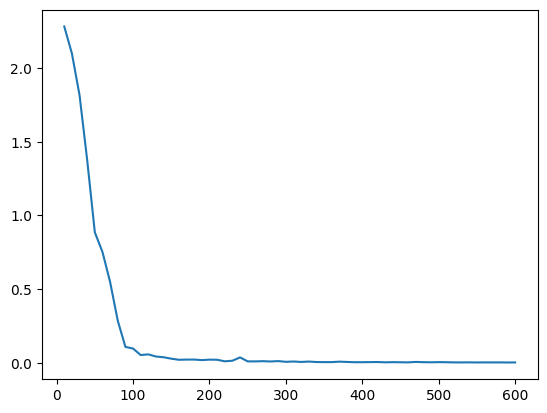

In [ ]:
import matplotlib.pyplot as plt
for epoch in range(30):

    for i, (inputs, labels) in enumerate(train_dataloader, 0):

        inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        if i % 10 == 0 :
            print(f"Epoch number {epoch}\n Current loss {loss.item()}\n")
            iteration_number += 10

            counter.append(iteration_number)
            loss_history.append(loss.item())

plt.plot(counter, loss_history)

In [ ]:
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_loss = 100000.0
    best_epoch = None
    model = model.to(device)

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        # Set to training mode
        model.train()

        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_data_loader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))


        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
        if valid_loss < best_loss:
            best_loss = valid_loss
            best_epoch = epoch

        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/test_data_size
        avg_valid_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss - {:.4f}, Accuracy - {:.4f}%, \n\t\tValidation : Loss - {:.4f}, Accuracy - {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))

        # Save if the model has best accuracy till now
        #torch.save(model, '_model_'+str(epoch)+'.pt')

    return model, history, best_epoch

Epoch: 1/50
Epoch : 000, Training: Loss - 1.5903, Accuracy - 50.9346%, 
		Validation : Loss - 0.6799, Accuracy - 81.4815%, Time: 25.6263s
Epoch: 2/50
Epoch : 001, Training: Loss - 1.1105, Accuracy - 68.2243%, 
		Validation : Loss - 0.5582, Accuracy - 72.2222%, Time: 26.7229s
Epoch: 3/50
Epoch : 002, Training: Loss - 0.6298, Accuracy - 82.2430%, 
		Validation : Loss - 0.6742, Accuracy - 77.7778%, Time: 26.7841s
Epoch: 4/50
Epoch : 003, Training: Loss - 0.5006, Accuracy - 84.1121%, 
		Validation : Loss - 1.3197, Accuracy - 66.6667%, Time: 26.1330s
Epoch: 5/50
Epoch : 004, Training: Loss - 0.5981, Accuracy - 82.7103%, 
		Validation : Loss - 1.7536, Accuracy - 55.5556%, Time: 26.2447s
Epoch: 6/50
Epoch : 005, Training: Loss - 0.4387, Accuracy - 85.5140%, 
		Validation : Loss - 1.5147, Accuracy - 62.9630%, Time: 26.5046s
Epoch: 7/50
Epoch : 006, Training: Loss - 0.6154, Accuracy - 84.1121%, 
		Validation : Loss - 1.4090, Accuracy - 57.4074%, Time: 26.3191s
Epoch: 8/50
Epoch : 007, Training:

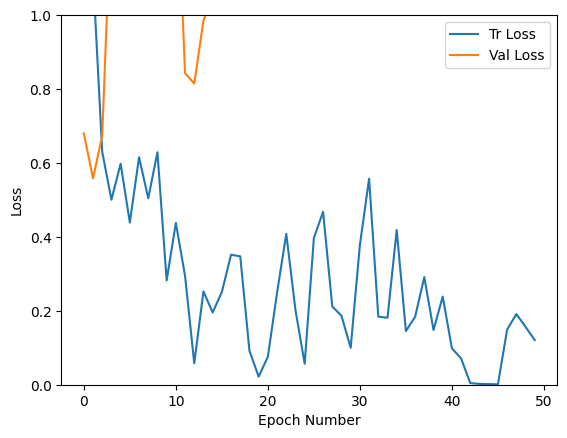

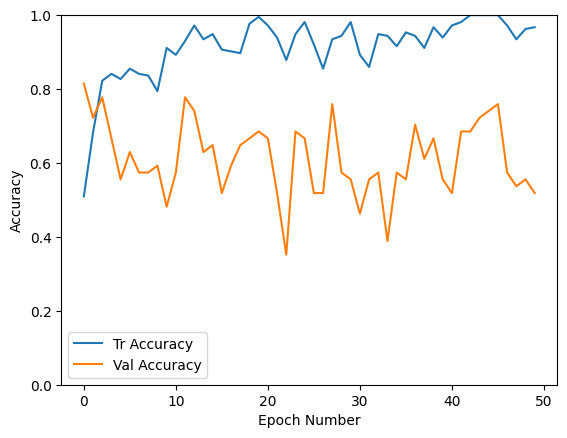

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_epochs = 50
trained_model, history, best_epoch = train_and_validate(net, loss_func, optimizer, num_epochs)

#torch.save(history, '_history.pt')
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.show()
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()